In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix

In [3]:
data = pd.read_excel(r"C:\Users\deeks\Downloads\telecom_churn.xlsx")

In [4]:
data

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,243549,Airtel,F,28,Mizoram,Kolkata,110295,2023-05-03,3,130580,28,9,4102,0
243549,243550,Reliance Jio,F,52,Assam,Kolkata,713481,2023-05-03,0,82393,80,45,7521,0
243550,243551,Reliance Jio,M,59,Tripura,Kolkata,520218,2023-05-03,4,51298,26,4,6547,0
243551,243552,BSNL,M,49,Madhya Pradesh,Kolkata,387744,2023-05-03,2,83981,80,15,1125,0


In [13]:

# Handle missing values if any
data.fillna(method='ffill', inplace=True)  # Forward fill missing values

C:\Users\deeks\AppData\Local\Temp\ipykernel_13684\1470588880.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill missing values


In [14]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['telecom_partner', 'gender', 'state', 'city']
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


In [15]:
# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(columns=['customer_id', 'date_of_registration']))
data_scaled = pd.DataFrame(scaled_features, columns=data.columns[2:])


In [16]:
# Split the data into training and testing sets
X = data_scaled.drop(columns=['churn'])
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   customer_id  telecom_partner  gender       age  state  city  pincode  \
0            1                2       0 -1.281782     10     4   755597   
1            2                2       0  0.542593     16     5   125926   
2            3                3       0  0.664218      1     2   423976   
3            4                1       1 -0.004720     22     4   522841   
4            5                1       0 -1.220969     24     2   740247   

  date_of_registration  num_dependents  estimated_salary  calls_made  \
0           2020-01-01        1.415256          1.064837   -0.170117   
1           2020-01-01        0.001767          1.213975    0.441016   
2           2020-01-01       -1.411722          1.701113   -0.000358   
3           2020-01-01       -0.704977         -1.234351    1.052149   
4           2020-01-01        0.001767         -0.797761    0.984245   

   sms_sent  data_used  
0  1.429025     -361.0  
1  1.021791     5973.0  
2  0.003706      193.0  
3  0.071578     

In [17]:
# Display processed data
print("Processed data:")
print(X_train.head())
print(y_train.head())

Processed data:
          gender       age     state      city   pincode  \
118890  1.341780  0.817578 -0.734469 -0.434607  1.465926   
173694  0.447149 -1.223125  1.515592  1.423972 -0.291588   
28678   0.447149  0.817578 -0.552032  0.804446 -0.291588   
187320  0.447149  0.817578  1.211530 -1.301944 -1.463263   
101172  0.447149 -1.223125  1.637217  0.928351  0.294250   

        date_of_registration  num_dependents  estimated_salary  calls_made  \
118890              1.381617       -0.704977         -0.086676    0.305208   
173694              0.840153        0.708512          0.436586   -0.373828   
28678               1.452497        0.708512          0.313549    1.289811   
187320             -1.524752        0.708512          1.594312    0.882389   
101172             -0.191030        0.708512         -0.512256   -0.713346   

        sms_sent  data_used  
118890  0.410940  -1.021133  
173694  0.207323   1.361929  
28678  -0.675018   1.046159  
187320  0.003706  -1.156754  
1011

In [34]:
# Assuming 'X' contains the features and 'y' contains the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:

# Initialize and train the logistic regression model
logistic_regression = LogisticRegression(max_iter=1000)  # Increase max_iter if necessary
logistic_regression.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [39]:
# Make predictions on the test set
y_pred = logistic_regression.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


C:\Users\deeks\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.7991624068485558
Precision: 0.0
Recall: 0.0
F1-score: 0.0


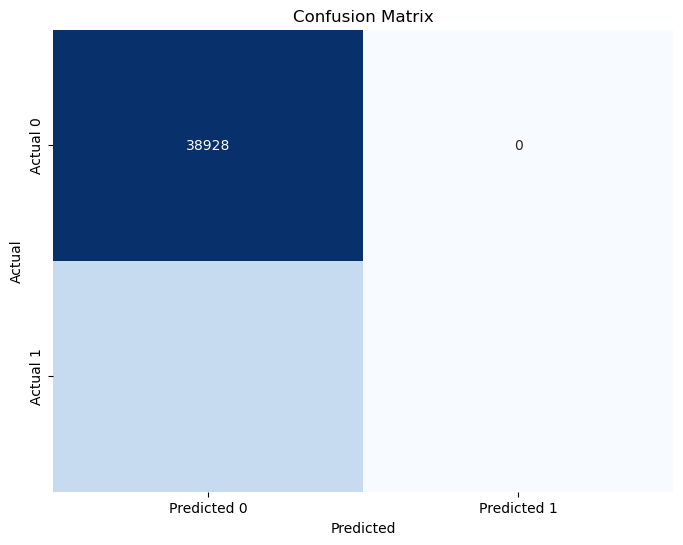

In [55]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to DataFrame for easy visualization
conf_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()